In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd
import os
print("Available datasets in Kaggle environment:")
print(os.listdir("/kaggle/input"))
file_path = "/kaggle/input/housepricing121/Housing.csv"
df = pd.read_csv(file_path)
print("Dataset Information:")
print(df.info())
print("\nSample Data:")
print(df.head())
print("\nMissing Values Summary:")
print(df.isnull().sum())


Available datasets in Kaggle environment:
['housepricing121']
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Sample Data:
      price  area  bedrooms  bathrooms  stories main

In [7]:
print("Available columns in dataset:")
print(df.columns)



Available columns in dataset:
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [10]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing Set: X_test = {X_test.shape}, y_test = {y_test.shape}")


Training Set: X_train = (436, 12), y_train = (436,)
Testing Set: X_test = (109, 12), y_test = (109,)


In [11]:
X = df.drop(columns=['basement'])
y = df['basement']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing Set: X_test = {X_test.shape}, y_test = {y_test.shape}")


Training Set: X_train = (436, 12), y_train = (436,)
Testing Set: X_test = (109, 12), y_test = (109,)


In [13]:
print("Column Data Types:\n", X_train.dtypes)


Column Data Types:
 price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [14]:
X_train = X_train.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])


In [15]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [17]:
y_train = y_train.map({'no': 0, 'yes': 1})  # Convert 'no' → 0, 'yes' → 1
y_test = y_test.map({'no': 0, 'yes': 1})


In [18]:
model.fit(X_train, y_train)


LinearRegression()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 0.40371195072213417
Mean Squared Error (MSE): 0.2143997304290017
R² Score: 0.01649297404364103


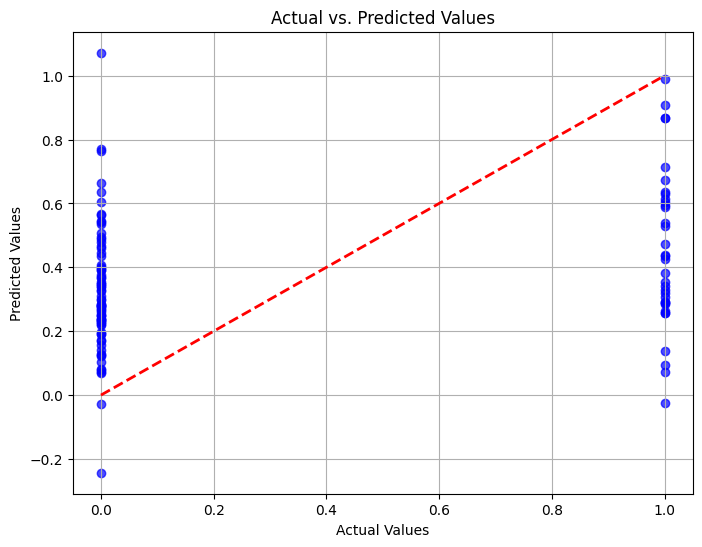

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--r", linewidth=2)  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()


In [21]:
import pandas as pd
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("Feature Importance (Coefficient Values):")
print(coefficients)


Feature Importance (Coefficient Values):
     Feature   Coefficient
2   bedrooms  8.616566e-02
0      price  1.213996e-07
1       area -3.531585e-05
5    parking -3.418126e-02
3  bathrooms -3.609773e-02
4    stories -2.197506e-01


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
print(X_train.corr())


              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.533820  0.371415   0.532511  0.405019  0.378698
area       0.533820  1.000000  0.154674   0.199208  0.070472  0.337417
bedrooms   0.371415  0.154674  1.000000   0.391447  0.405104  0.141470
bathrooms  0.532511  0.199208  0.391447   1.000000  0.315805  0.194037
stories    0.405019  0.070472  0.405104   0.315805  1.000000  0.050604
parking    0.378698  0.337417  0.141470   0.194037  0.050604  1.000000


In [24]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge.fit(X_train, y_train)


Ridge()